# Lab 7/ Spotify data set😜😜😜😜

Minakov Nikita, csse 1707DA

@minakov.nv

In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import pandas as pd
import nsfg
import first
import thinkstats2
import thinkplot

import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from scipy import stats

## Scatter plots

In [2]:
db_read = pd.read_csv('SpotifyFeatures.csv', delimiter = ',')

In [5]:
db_read

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.9100,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.8140
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.7370,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.8160
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.1310,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.3680
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.3260,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.2270
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.2250,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.3900
5,Movie,Henri Salvador,Le petit souper aux chandelles,0Mf1jKa8eNAf1a4PwTbizj,0,0.74900,0.578,160627,0.0948,0.000000,C#,0.1070,-14.970,Major,0.1430,87.479,4/4,0.3580
6,Movie,Martin & les fées,"Premières recherches (par Paul Ventimila, Lori...",0NUiKYRd6jt1LKMYGkUdnZ,2,0.34400,0.703,212293,0.2700,0.000000,C#,0.1050,-12.675,Major,0.9530,82.873,4/4,0.5330
7,Movie,Laura Mayne,Let Me Let Go,0PbIF9YVD505GutwotpB5C,15,0.93900,0.416,240067,0.2690,0.000000,F#,0.1130,-8.949,Major,0.0286,96.827,4/4,0.2740
8,Movie,Chorus,Helka,0ST6uPfvaPpJLtQwhE6KfC,0,0.00104,0.734,226200,0.4810,0.000860,C,0.0765,-7.725,Major,0.0460,125.080,4/4,0.7650
9,Movie,Le Club des Juniors,Les bisous des bisounours,0VSqZ3KStsjcfERGdcWpFO,10,0.31900,0.598,152694,0.7050,0.001250,G,0.3490,-7.790,Major,0.0281,137.496,4/4,0.7180


The following function selects a random subset of a `DataFrame`.

In [3]:
def SampleRows(db_read, nrows, replace=False):
    indices = np.random.choice(db_read.index, nrows, replace=replace)
    sample = db_read.loc[indices]
    return sample

I'll extract the popularity and the danceability in the sample.

In [8]:
sample = SampleRows(db_read, 5000)
s_popularity, s_dance = sample.popularity, sample.danceability

Here's a simple scatter plot with `alpha=1`, so each data point is fully saturated.

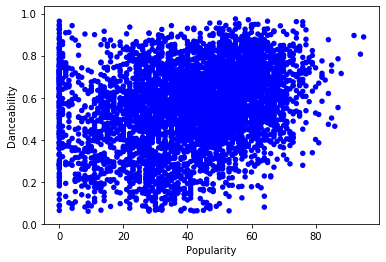

In [11]:
thinkplot.Scatter(s_popularity, s_dance, alpha=1)
thinkplot.Config(xlabel='Popularity',
                 ylabel='Danceability',
                 #axis=[140, 210, 20, 200],
                 legend=False)

Dana's raft shows the relationship between track popularity and danceability. A clear blue line appears to be hollow at 0 popularity.
Also starting from 20 to 63 popularity and densability from 0.4 to 0.8 there is a pronounced blue spot.

The data fall in obvious columns because they were rounded off.  We can reduce this visual artifact by adding some random noice to the data.

Here I am using a normal distribution.  The normal distribution does a better job of blurring artifacts.

In [108]:
def Jitter(values, jitter=1):
    n = len(values)
    return np.random.normal(0, jitter, n) + values

In [109]:
s_popularity = Jitter(s_popularity)
s_dance = Jitter(s_dance)

And here's what the jittered data look like.

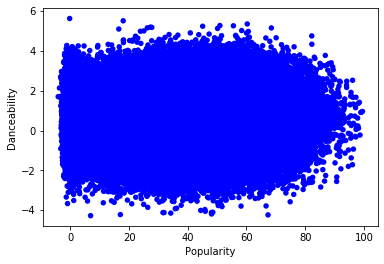

In [110]:
thinkplot.Scatter(s_popularity, s_dance, alpha=1.0)
thinkplot.Config(xlabel='Popularity',
                 ylabel='Danceability',
                 legend=False)

After rounding data I got denser spot.

I adjusted `alpha` and the size of the markers, `s` to solve saturation problem.

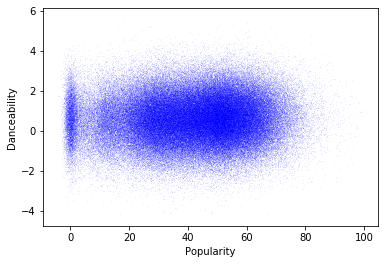

In [113]:
thinkplot.Scatter(s_popularity, s_dance, alpha=1, s=0.1)
thinkplot.Config(xlabel='Popularity',
                 ylabel='Danceability',
                 legend=False)

This is the most accurate location and shape of distribution shown on the graph.

Also I can do this ising HexBin and divide my data into bins of different size.

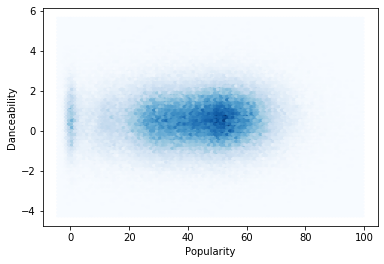

In [114]:
thinkplot.HexBin(s_popularity, s_dance, alpha=1)
thinkplot.Config(xlabel='Popularity',
                 ylabel='Danceability',
                 legend=False)

Here we got an even more accurate distribution.  Also it obscures the row and column effects.

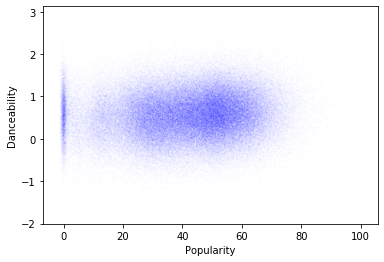

In [34]:
s_popularity = Jitter(db_read.popularity)
s_dance = Jitter(db_read.danceability)

thinkplot.Scatter(s_popularity, s_dance, alpha=0.01, s=2)
thinkplot.Config(xlabel='Popularity',
                 ylabel='Danceability')

Here we see the distribution not of our sample consisting of only 5000 lines, but of the entire dataset. As you can see a large difference in the distribution is not observed.

## Plotting percentiles


Then I'll divide the dataset into groups by popularity.

In [36]:
bins = np.arange(0, 100, 10)
indices = np.digitize(db_read.popularity, bins)
groups = db_read.groupby(indices)

Here are the number of rows in each group:

In [37]:
for i, group in groups:
    print(i, len(group))

1 14517
2 15933
3 29889
4 40584
5 46785
6 48563
7 27453
8 7762
9 1109
10 130


Now we can compute the CDF of popularity within each group.

In [104]:
mean_popularity = [group.popularity.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.popularity) for i, group in groups]

And then extract the 10th, 50th, and 80th percentile from each group.

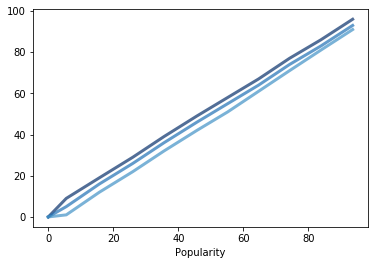

In [107]:
for percent in [80, 50, 10]:
    popult_percentiles = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(mean_popularity, popult_percentiles, label=label)
    
thinkplot.Config(xlabel='Popularity',
                 legend=False)

We got straight lines with a slight offset but maintaining parallelism over almost the entire gap.

## Correlation

The following function computes the covariance of two variables using NumPy's `dot` function.

In [50]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

Covariance for popularity and danceability

In [51]:
c_pop, c_dan = db_read.popularity, db_read.danceability
Cov(c_pop, c_dan)

0.8662102550423721

Here is the coefficient of correlation.

In [52]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

The correlation of popularity and danceability is about 0.25, which is a not a strong correlation.

In [53]:
Corr(c_pop, c_dan)

0.2565644748381525

NumPy provides a function that computes correlations, too:

In [54]:
np.corrcoef(c_pop, c_dan)

array([[1.        , 0.25656447],
       [0.25656447, 1.        ]])

The result is a matrix with self-correlations on the diagonal (which are always 1), and cross-correlations on the off-diagonals (which are always symmetric).

Here is the Spearman's correlation:

In [55]:
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

For danceability and popularity, Spearman's correlation is a little higher:

In [56]:
SpearmanCorr(c_pop, c_dan)

0.2571390609550969

Also there is pre-installed function in Pandas

In [57]:
def SpearmanCorr(xs, ys):
    xs = pd.Series(xs)
    ys = pd.Series(ys)
    return xs.corr(ys, method='spearman')

The result is the same

In [59]:
SpearmanCorr(c_pop, c_dan)

0.25713906095509687

And so, after constructing all these graphs, it became clear that these 2 parameters have weak correlation, and knowing one of the parameters, it is not possible to accurately predict the other one. 

## Genre vs Popularity

Here I converted genre column into numeric values and wanted to determine, Does popularity depend on the chosen genre.

In [81]:
db_read.genre.value_counts()

7     14756
1      9681
2      9646
3      9543
4      9441
5      9386
6      9377
8      9299
9      9295
10     9272
11     9263
12     9256
13     9232
14     9096
15     9089
26     9023
16     8992
17     8936
18     8927
19     8874
20     8771
21     8701
22     8664
23     8280
24     7806
25      119
Name: genre, dtype: int64

In [80]:
db_read.genre[db_read.genre == 'Comedy'] = 1
db_read.genre[db_read.genre == 'Soundtrack'] =2
db_read.genre[db_read.genre =='Indie'] =3
db_read.genre[db_read.genre == 'Jazz'] =4
db_read.genre[db_read.genre == 'Pop'] =5
db_read.genre[db_read.genre == 'Electronic'] =6
db_read.genre[db_read.genre == "Children’s Music"] =7
db_read.genre[db_read.genre == 'Folk'] =8
db_read.genre[db_read.genre == 'Hip-Hop'] =9
db_read.genre[db_read.genre == 'Rock'] =10
db_read.genre[db_read.genre == 'Alternative'] =11
db_read.genre[db_read.genre == 'Classical'] =12
db_read.genre[db_read.genre =='Rap'] =13
db_read.genre[db_read.genre == 'World'] =14
db_read.genre[db_read.genre == 'Soul'] =15
db_read.genre[db_read.genre == 'R&B'] =16
db_read.genre[db_read.genre == 'Anime'] =17
db_read.genre[db_read.genre == 'Reggaeton'] =18
db_read.genre[db_read.genre == 'Ska'] =19
db_read.genre[db_read.genre == 'Reggae'] =20
db_read.genre[db_read.genre == 'Dance'] =21
db_read.genre[db_read.genre == 'Country'] =22
db_read.genre[db_read.genre =='Opera'] =23
db_read.genre[db_read.genre == 'Movie'] =24
db_read.genre[db_read.genre == "Children's Music"] =7
db_read.genre[db_read.genre == 'A Capella'] =25
db_read.genre[db_read.genre == 'Blues'] =26

C:\Users\asus.VENIK\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\asus.VENIK\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\asus.VENIK\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\U

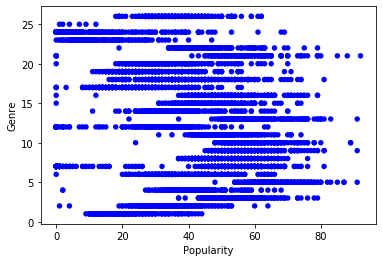

In [93]:
sample = SampleRows(db_read, 5000)
s_popularity, s_genre = sample.popularity, sample.genre
thinkplot.Scatter(s_popularity, s_genre, alpha=1)
thinkplot.Config(xlabel='Popularity',
                 ylabel='Genre',
                 legend=False)

This graph clearly shows the distribution of popularity for each of the genres. 

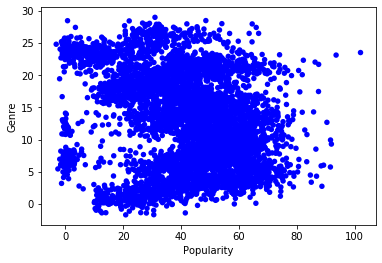

In [92]:
s_popularity = Jitter(s_popularity)
s_genre = Jitter(s_genre)
thinkplot.Scatter(s_popularity, s_genre, alpha=1.0)
thinkplot.Config(xlabel='Popularity',
                 ylabel='Genre',
                 legend=False)

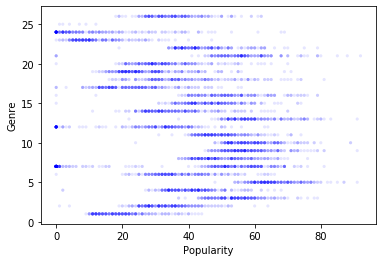

In [97]:
thinkplot.Scatter(s_popularity, s_genre, alpha=0.1, s=10)
thinkplot.Config(xlabel='Popularity',
                 ylabel='Genre',
                 legend=False)

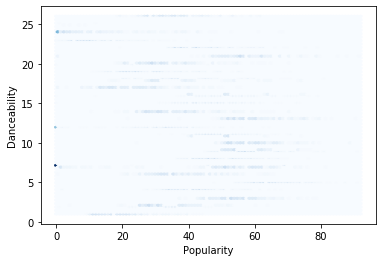

In [96]:
thinkplot.HexBin(s_popularity, s_genre)
thinkplot.Config(xlabel='Popularity',
                 ylabel='Genre',
                 legend=False)

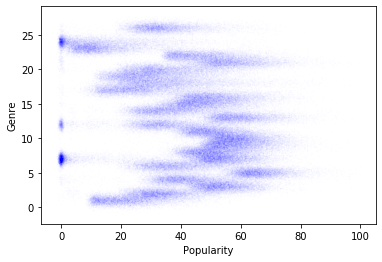

In [101]:
s_popularity = Jitter(db_read.popularity)
s_genre = Jitter(db_read.genre)

thinkplot.Scatter(s_popularity, s_genre, alpha=0.01, s=2)
thinkplot.Config(xlabel='Popularity',
                 ylabel='Genre')

After building all these graphs, the influence of the genre on the popularity of music became apparent. Many graphs show a pronounced preponderance of popularity to a hundred than in other genres. As a result, we can conclude that the choice of a genre of music will greatly influence its popularity. These graphs give a visual representation of the dependence of these two variables.